In [29]:
import shutil
from keras import layers
from keras import models
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

import tensorflow as tf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle

from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization,Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model


import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True' #resolving issue with keras killing kernel

import warnings
warnings.filterwarnings('ignore')

This is kaglle  Jellyfish Image Dataset (https://www.kaggle.com/datasets/anshtanwar/jellyfish-types/data).
This dataset contains 900 images of jellyfish belonging to six different categories and species: mauve stinger jellyfish, moon jellyfish, barrel jellyfish, blue jellyfish, compass jellyfish, and lion’s mane jellyfish. You can apply ML techniques to gain insights into jellyfish classification, species identification, and color analysis.

**Moon jellyfish (Aurelia aurita)**: Common jellyfish with four horseshoe-shaped gonads visible through the top of its translucent bell. It feeds by collecting medusae, plankton, and mollusks with its tentacles.
**Barrel jellyfish (Rhizostoma pulmo)**: Largest jellyfish found in British waters, with a bell that can grow up to 90 cm in diameter. It feeds on plankton and small fish by catching them in its tentacles.
**Blue jellyfish (Cyanea lamarckii)**: Large jellyfish that can grow up to 30 cm in diameter. It feeds on plankton and small fish by catching them in its tentacles.
**Compass jellyfish (Chrysaora hysoscella)**: Named after the brown markings on its bell that resemble a compass rose. It feeds on plankton and small fish by catching them in its tentacles.
**Lion’s mane jellyfish (Cyanea capillata)**: Largest jellyfish in the world, with a bell that can grow up to 2 meters in diameter and tentacles that can reach up to 30 meters in length. It feeds on plankton and small fish by catching them in its tentacles.
**Mauve stinger (Pelagia noctiluca)**: Small jellyfish with long tentacles and warty structures on its bell full of stinging cells. It feeds on other small jellyfish and oceanic sea squirts.

In [30]:
os.getcwd()

'C:\\Users\\Peter\\DataspellProjects\\kaggle\\jellyfish_image_classification'

In [31]:
TRAIN_DIR = 'C:/Users/Peter/DataspellProjects/kaggle/jellyfish_image_classification/data/Train_Test_Valid/Train'
TEST_DIR = 'C:/Users/Peter/DataspellProjects/kaggle/jellyfish_image_classification/data/Train_Test_Valid/test'
IMG_SIZE = 224# our images are 224x224x3


### 1 approach


In [32]:
#Converting the output into one-hot format
def label_img(img):
    word_label = img.split('_')[0]
    if word_label == 'barrel': return [1,0,0,0,0,0]
    elif word_label == 'blue': return [0,1,0,0,0,0]
    elif word_label == 'compass': return [0,0,1,0,0,0]
    elif word_label == 'lions': return [0,0,0,1,0,0]
    elif word_label == 'mauve': return [0,0,0,0,1,0]
    elif word_label == 'Moon': return [0,0,0,0,0,1]

In [33]:
#A function to read training images from folder
def create_train_data():
    training_data = []
    for fold in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(fold)
        path = TRAIN_DIR + '/' + fold
        files_names = os.listdir(path)
        for filename in files_names:
            path_img = path + '/' + filename
            img = cv2.imread(path_img,1)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            training_data.append([np.array(img),np.array(label)])
            
        
    shuffle(training_data)
    train_images, train_labels = zip(*training_data)  # Разделяем изображения и метки

    return training_data

100%|██████████| 6/6 [00:00<00:00,  8.43it/s]


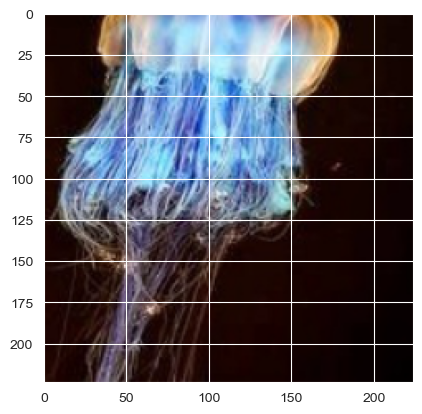

In [34]:
train_data = create_train_data()
plt.imshow(train_data[0][0])

In [35]:
#A function to read training images from folder
def create_test_data():
    testing_data = []
    for fold in tqdm(os.listdir(TEST_DIR)):
        label = label_img(fold)
        path = TEST_DIR + '/' + fold
        # print(label)
        # print(path)
        files_names = os.listdir(path)
        for filename in files_names:
            path_img = path + '/' + filename
            img = cv2.imread(path_img,1)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            testing_data.append([np.array(img),np.array(label)])

    shuffle(testing_data)
    images, labels = zip(*testing_data)  # Разделяем изображения и метки


    return testing_data

In [15]:

# Creating a Sequential model
model = Sequential()

model.add(Conv2D(kernel_size=(3, 3), filters=32, input_shape=(224, 224, 3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('tanh'))

model.add(Conv2D(filters=30, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(filters=30, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(filters=30, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('tanh'))

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(20, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(15, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(6, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    metrics=['acc'],
    optimizer=optimizers.Adam(learning_rate=1e-3)
)


In [16]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 30)      8670      
                                                                 
 batch_normalization_1 (Batc  (None, 220, 220, 30)     120       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 220, 220, 30)      0

In [36]:
train_images, train_labels = zip(*train_data)  # Разделяем изображения и метки
train_labels

(array([0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 1, 0, 0]),
 array([0, 1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0]),
 array([0, 1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1]),
 array([0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 1]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 

In [50]:
X_train,X_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [38]:
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [39]:

y_val.shape

(225, 6)

In [40]:
X_train.shape

(675, 224, 224, 3)

In [27]:
# Training the model
history = model.fit(X_train,y_train,epochs=50,batch_size=50,validation_data=(X_val,y_val))

NameError: name 'model' is not defined

In [176]:
model.save('model_1.h5') #first variant 

#### 2 approach

In [49]:
# train_datagen = ImageDataGenerator(rescale=1.0/255,
#                                    zoom_range=0.2,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    fill_mode='nearest')

train_datagen = ImageDataGenerator(
    rescale=1.0/255,           # rescale
    rotation_range=30,         # Randomly rotate images by 20 degrees
    width_shift_range=0.1,     # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.1,    # Randomly shift images vertically by 20% of the height
    zoom_range=0.3,            # Randomly zoom into images
    horizontal_flip=True,      # Randomly flip images horizontally
    vertical_flip=True,        # Randomly flip images vertically
)
datagen1 = ImageDataGenerator()

# train_generator = datagen.flow(X_train, y_train, batch_size=20)
val_generator = datagen1.flow(X_test, y_test, batch_size=20)
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size=(IMG_SIZE, IMG_SIZE),
                                                    batch_size=50,
                                                    class_mode='categorical',
                                                    shuffle=True)

NameError: name 'X_test' is not defined

In [42]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(TEST_DIR,
                                                              target_size=(IMG_SIZE, IMG_SIZE),
                                                              batch_size=50,
                                                              class_mode='categorical',
                                                              shuffle=True)

Found 40 images belonging to 6 classes.


In [43]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Moon_jellyfish
1 : barrel_jellyfish
2 : blue_jellyfish
3 : compass_jellyfish
4 : lions_mane_jellyfish
5 : mauve_stinger_jellyfish


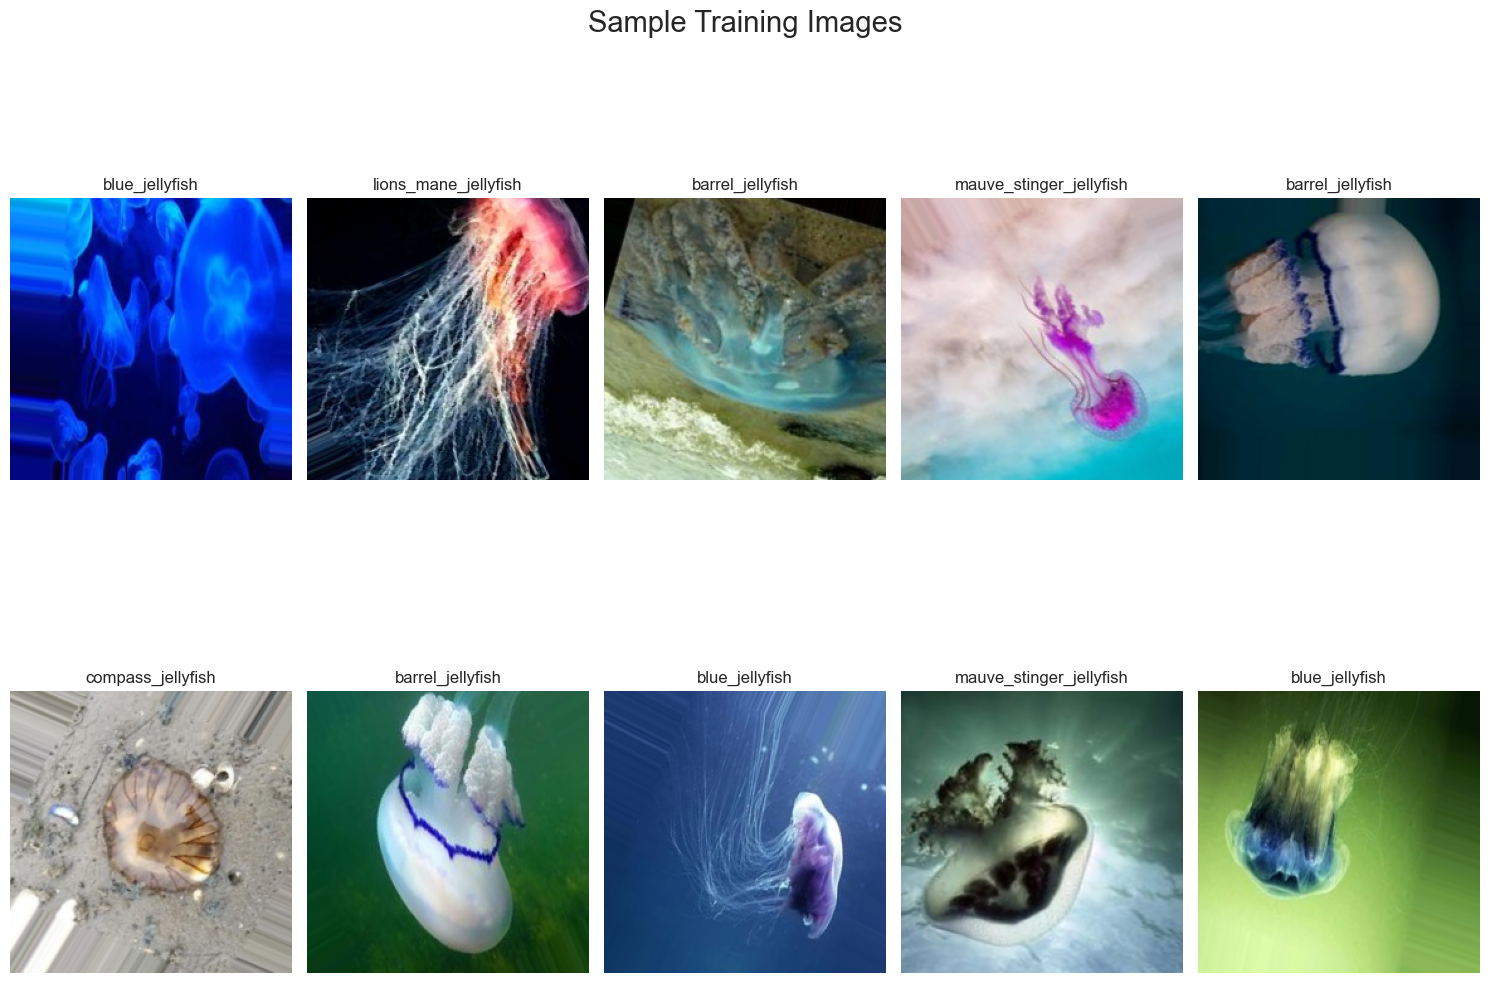

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [48]:

# # Creating a Sequential model
# cnn_model = Sequential()
# 
# cnn_model.add(Conv2D(kernel_size=(3, 3), filters=32, input_shape=(224, 224, 3), padding='valid'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Activation('tanh'))
# 
# cnn_model.add(Conv2D(filters=30, kernel_size=(3, 3)))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Activation('tanh'))
# cnn_model.add(MaxPooling2D(2, 2))
# 
# cnn_model.add(Conv2D(filters=30, kernel_size=(3, 3)))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Activation('tanh'))
# cnn_model.add(MaxPooling2D(2, 2))
# 
# cnn_model.add(Conv2D(filters=30, kernel_size=(3, 3)))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Activation('tanh'))
# 
# cnn_model.add(Dropout(0.5))
# cnn_model.add(Flatten())
# 
# cnn_model.add(Dense(20, activation='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Dense(15, activation='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Dense(6, activation='softmax'))
# 
# cnn_model.compile(
#     # loss=CategoricalCrossentropy,
#     loss='categorical_crossentropy',
#     metrics=['accuracy'],
#     optimizer=optimizers.Adam(learning_rate=1e-3)
# )

cnn_model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
cnn_model.add(Conv2D(16, (3, 3), padding='same', input_shape=(224, 224, 3)))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
# CONV => RELU => CONV => RELU => POOL => DROPOUT
cnn_model.add(Conv2D(64, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
# FLATTERN => DENSE => RELU => DROPOUT
cnn_model.add(Flatten())
cnn_model.add(Dense(128))
cnn_model.add(Activation('relu'))
cnn_model.add(Dense(32))
cnn_model.add(Activation('relu'))
cnn_model.add(Dense(6, activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=30,         # Randomly rotate images by 20 degrees
    #brightness_range=[0., 0.5],  # Adjust brightness between 10% and 200%
    width_shift_range=0.1,     # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.1,    # Randomly shift images vertically by 20% of the height
    shear_range=0.1,           # Shear intensity
    zoom_range=0.3,            # Randomly zoom into images
    horizontal_flip=True,      # Randomly flip images horizontally
    vertical_flip=True,        # Randomly flip images vertically
)
datagen1 = ImageDataGenerator()

train_generator = datagen.flow(X_train, y_train, batch_size=20)
val_generator = datagen1.flow(X_test, y_test, batch_size=20)

NameError: name 'X_test' is not defined

In [52]:
# Model Summary
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 activation_15 (Activation)  (None, 224, 224, 16)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      4640      
                                                                 
 activation_16 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 112, 112, 32)      0         
                                                      

In [48]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [53]:
history = cnn_model.fit(train_generator, epochs=130, validation_data=val_generator,
                    verbose=1,
                    # callbacks=[reduce_lr]
                        )

Epoch 1/130
36/36 [==============================] - 27s 701ms/step - loss: 2.0950 - accuracy: 0.2722 - val_loss: 1.6378 - val_accuracy: 0.3722
Epoch 2/130
36/36 [==============================] - 25s 700ms/step - loss: 1.4940 - accuracy: 0.4167 - val_loss: 1.5011 - val_accuracy: 0.3944
Epoch 3/130
36/36 [==============================] - 25s 683ms/step - loss: 1.3445 - accuracy: 0.4639 - val_loss: 1.4410 - val_accuracy: 0.4222
Epoch 4/130
36/36 [==============================] - 24s 674ms/step - loss: 1.2631 - accuracy: 0.5194 - val_loss: 1.2718 - val_accuracy: 0.5500
Epoch 5/130
36/36 [==============================] - 25s 693ms/step - loss: 1.2038 - accuracy: 0.5278 - val_loss: 1.3482 - val_accuracy: 0.4667
Epoch 6/130
36/36 [==============================] - 25s 698ms/step - loss: 1.2214 - accuracy: 0.5222 - val_loss: 1.2435 - val_accuracy: 0.5278
Epoch 7/130
36/36 [==============================] - 24s 672ms/step - loss: 1.0679 - accuracy: 0.5833 - val_loss: 1.2846 - val_accuracy:

In [56]:
cnn_model.save('model_new.h5') #second variant 

In [25]:

model = load_model('model3_.h5')    

In [61]:
model.predict(val_generator)

9/9 [==============================] - 1s 57ms/step


array([[4.3285498e-04, 2.0214675e-04, 3.1918459e-04, 9.6953630e-01,
        2.0085666e-02, 9.4237626e-03],
       [1.1993619e-04, 7.4653983e-10, 8.3493524e-06, 1.2856976e-05,
        6.9388002e-01, 3.0597892e-01],
       [6.2369142e-04, 9.9925148e-01, 4.6417412e-09, 2.4761055e-05,
        9.9885119e-07, 9.9106866e-05],
       ...,
       [5.7553854e-05, 9.9961311e-01, 1.4920236e-04, 5.0277456e-05,
        9.1731221e-05, 3.8145037e-05],
       [9.6946337e-07, 2.5058566e-02, 3.9005675e-04, 7.3497661e-04,
        9.6891171e-01, 4.9037077e-03],
       [8.5957742e-01, 5.0632283e-04, 9.4147325e-02, 3.9370329e-04,
        6.4551939e-05, 4.5310695e-02]], dtype=float32)

In [66]:
from sklearn.metrics import classification_report

# Предсказания модели на валидационном наборе данных
predictions = model.predict(val_generator)

# Преобразуйте вероятности предсказаний в метки классов
predicted_classes = np.argmax(predictions, axis=1)

# Извлеките фактические метки классов из генератора
# true_classes = val_generator.classes
true_classes = np.argmax(y_test, axis=1)

# Извлеките названия классов из генератора
# class_labels = list(val_generator.class_indices.keys())

# Выведите отчет о классификации
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

9/9 [==============================] - 0s 42ms/step
                         precision    recall  f1-score   support

         Moon_jellyfish       0.23      0.25      0.24        28
       barrel_jellyfish       0.19      0.19      0.19        32
         blue_jellyfish       0.17      0.18      0.18        28
      compass_jellyfish       0.09      0.09      0.09        34
   lions_mane_jellyfish       0.11      0.12      0.11        33
mauve_stinger_jellyfish       0.11      0.08      0.09        25

               accuracy                           0.15       180
              macro avg       0.15      0.15      0.15       180
           weighted avg       0.15      0.15      0.15       180


In [68]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy)) + 1  # Add 1 because epochs are 1-indexed

print(f"Best Accuracy: {accuracy[best_epoch-1]:.4f} at Epoch {best_epoch}")
print(f"Best Validation Accuracy: {val_accuracy[best_epoch-1]:.4f} at Epoch {best_epoch}")

Best Accuracy: 0.9653 at Epoch 95
Best Validation Accuracy: 0.9222 at Epoch 95


In [67]:
# Оценка модели на валидационных данных
evaluation = cnn_model.evaluate(val_generator)

# Вывод метрик
print(f"Loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1]}")

9/9 [==============================] - 1s 141ms/step - loss: 0.8322 - accuracy: 0.8278
Loss: 0.8321794867515564
Accuracy: 0.8277778029441833


In [18]:

from sklearn.metrics import multilabel_confusion_matrix

# Расчет матрицы ошибок для каждого класса
conf_matrices = multilabel_confusion_matrix(y_true, y_pred_labels)

y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred_labels)

# Calculate class weights to account for imbalanced classes (optional)
weights = class_weight.compute_sample_weight('balanced', y_true)

# Normalize the confusion matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Get class names from your data
classes = ["Class1", "Class2", "Class3", "Class4", "Class5", "Class6"]  # Replace with your actual class names

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

NameError: name 'y_true' is not defined

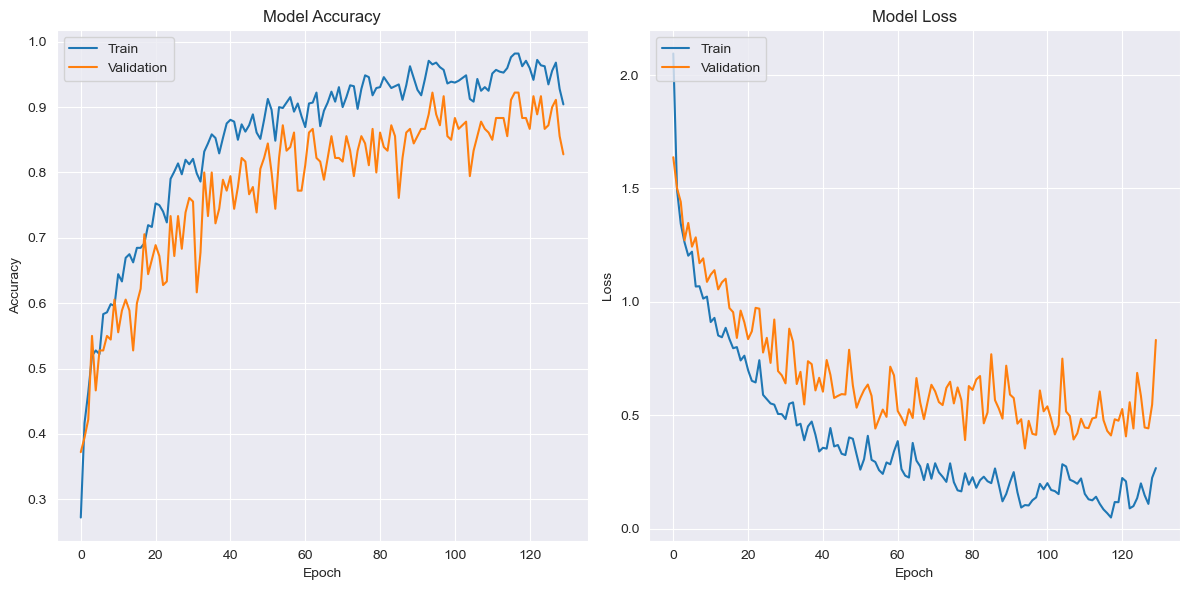

In [94]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Make predictions and header 

In [ ]:
23

# Alternative


In [8]:
def load_data(data_directory):
    images = []
    labels = []
    classes = []
    label_encoder = LabelEncoder()
    # iterating over classes in a directory, then iterating over the images within each class
    for class_name in os.listdir(data_directory):
        class_path = os.path.join(data_directory, class_name)
        classes.append(class_name)

        for filename in os.listdir(class_path):
            filepath = os.path.join(class_path, filename)
            img = cv2.imread(filepath)
            # Data Processing: 
            # 1)resizing the images to (224, 224),
            # 2)dividing by 255 to normalize pixel values, and converting to RGB.                     
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (224, 224))
                img = img / 255.0
                images.append(img)
                labels.append(class_name)

    images = np.array(images)
    labels = label_encoder.fit_transform(labels)

    return images, labels, classes

In [9]:
images, labels, classes =load_data(TRAIN_DIR)

In [10]:
X_train, X_test ,y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

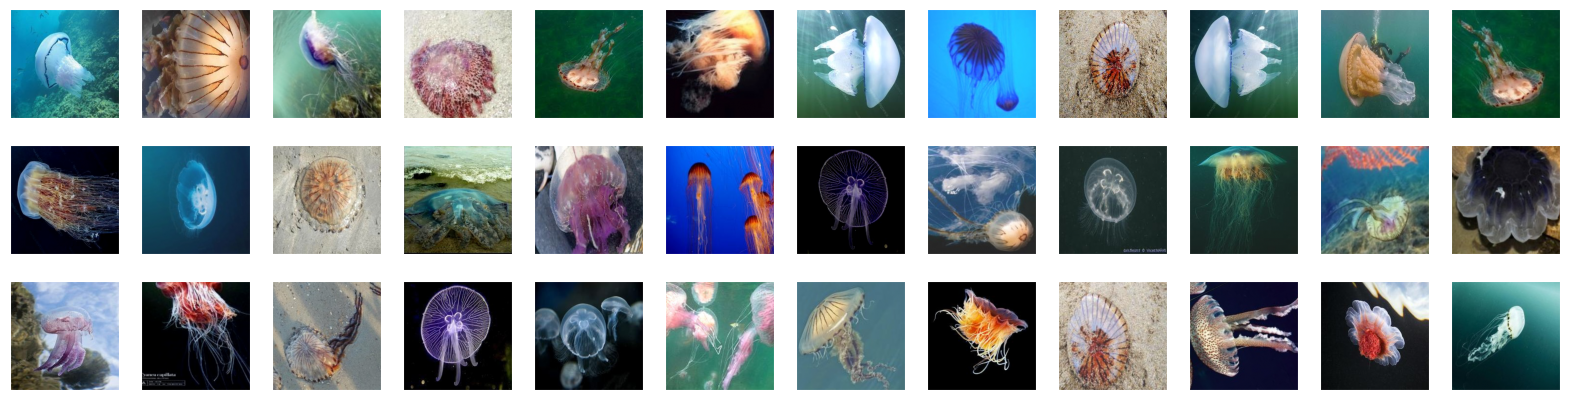

In [11]:
fig = plt.figure(figsize=(20,5))

for i in range(36):
    ax = fig.add_subplot(3,12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [12]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

In [13]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(.3))

model.add(Flatten())
model.add(Dense(255, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(6, activation='softmax'))

model.summary()      

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [14]:
model.compile(loss='categorical_crossentropy',  metrics =['accuracy'])

In [40]:
model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
23/23 [==============================] - 8s 289ms/step - loss: 2.1478 - accuracy: 0.2819 - val_loss: 1.5271 - val_accuracy: 0.3722
Epoch 2/5
23/23 [==============================] - 7s 300ms/step - loss: 1.3932 - accuracy: 0.4611 - val_loss: 1.4506 - val_accuracy: 0.4389
Epoch 3/5
23/23 [==============================] - 6s 240ms/step - loss: 1.0955 - accuracy: 0.6014 - val_loss: 1.3848 - val_accuracy: 0.4556
Epoch 4/5
23/23 [==============================] - 6s 255ms/step - loss: 0.9169 - accuracy: 0.6708 - val_loss: 1.6671 - val_accuracy: 0.4111
Epoch 5/5
23/23 [==============================] - 6s 254ms/step - loss: 0.7258 - accuracy: 0.7319 - val_loss: 1.4098 - val_accuracy: 0.4778


In [16]:
model.compile(loss='categorical_crossentropy', optimizer = 'Nadam', metrics =['accuracy'])

In [28]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=500,epochs=100)

Epoch 1/100
2/2 [==============================] - 5s 2s/step - loss: 0.6269 - accuracy: 0.7986 - val_loss: 1.2792 - val_accuracy: 0.5056
Epoch 2/100
2/2 [==============================] - 4s 1s/step - loss: 0.6583 - accuracy: 0.7778 - val_loss: 1.1857 - val_accuracy: 0.5611
Epoch 3/100
2/2 [==============================] - 4s 1s/step - loss: 0.5554 - accuracy: 0.8208 - val_loss: 1.2819 - val_accuracy: 0.5500
Epoch 4/100
2/2 [==============================] - 4s 1s/step - loss: 0.5881 - accuracy: 0.8014 - val_loss: 1.2866 - val_accuracy: 0.5667
Epoch 5/100
2/2 [==============================] - 4s 1s/step - loss: 0.5901 - accuracy: 0.7972 - val_loss: 1.2721 - val_accuracy: 0.5556
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 0.5896 - accuracy: 0.7861 - val_loss: 1.1711 - val_accuracy: 0.5722
Epoch 7/100
2/2 [==============================] - 4s 1s/step - loss: 0.4948 - accuracy: 0.8278 - val_loss: 1.1578 - val_accuracy: 0.6000
Epoch 8/100
2/2 [=================

In [29]:
from sklearn.metrics import classification_report

# Предсказания модели на валидационном наборе данных
predictions = model.predict(validation_generator)

# Преобразуйте вероятности предсказаний в метки классов
predicted_classes = np.argmax(predictions, axis=1)

# Извлеките фактические метки классов из генератора
true_classes = validation_generator.classes

# Извлеките названия классов из генератора
class_labels = list(validation_generator.class_indices.keys())

# Выведите отчет о классификации
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

1/1 [==============================] - 0s 137ms/step
                         precision    recall  f1-score   support

         Moon_jellyfish       0.00      0.00      0.00         6
       barrel_jellyfish       0.10      0.20      0.13         5
         blue_jellyfish       0.67      0.29      0.40         7
      compass_jellyfish       0.10      0.14      0.12         7
   lions_mane_jellyfish       0.12      0.12      0.12         8
mauve_stinger_jellyfish       0.00      0.00      0.00         7

               accuracy                           0.12        40
              macro avg       0.17      0.13      0.13        40
           weighted avg       0.17      0.12      0.13        40


In [2]:
from keras.models import load_model

# Загрузка модели
model1 = load_model('C:/Users/Peter/DataspellProjects/kaggle/jellyfish_image_classification/model_1.h5')
model2 = load_model('C:/Users/Peter/DataspellProjects/kaggle/jellyfish_image_classification/model_2.h5')
model3 = load_model('C:/Users/Peter/DataspellProjects/kaggle/jellyfish_image_classification/model3_.h5')
model4 = load_model('C:/Users/Peter/DataspellProjects/kaggle/jellyfish_image_classification/model_new.h5')


In [90]:
# Оценка модели на валидационных данных
evaluation = model1.evaluate(val_generator)

# Вывод метрик
print(f"Loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1]}")

9/9 [==============================] - 3s 358ms/step - loss: 2.6430 - acc: 0.1833
Loss: 2.643043041229248
Accuracy: 0.18333333730697632


In [91]:
# Оценка модели на валидационных данных
evaluation = model2.evaluate(val_generator)

# Вывод метрик
print(f"Loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1]}")

9/9 [==============================] - 4s 362ms/step - loss: 0.6433 - accuracy: 0.7944
Loss: 0.6432778835296631
Accuracy: 0.7944444417953491


In [92]:
# Оценка модели на валидационных данных
evaluation = model3.evaluate(val_generator)

# Вывод метрик
print(f"Loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1]}")

9/9 [==============================] - 1s 41ms/step - loss: 0.3284 - accuracy: 0.8944
Loss: 0.32844972610473633
Accuracy: 0.894444465637207


In [62]:
from PIL import Image

# Путь к изображению на вашем компьютере
image_path = 'C:/Users/Peter/DataspellProjects/kaggle/jellyfish_image_classification/moon-jellyfish.jpg'

# Отображение изображения
image_pred = Image.open(image_path)
image_pred_resized = image_pred.resize((224, 224))

image_tensor = tf.keras.preprocessing.image.img_to_array(image_pred_resized)
image_tensor = image_tensor[np.newaxis, ...]


In [65]:
model4.predict(image_tensor)

1/1 [==============================] - 0s 31ms/step


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

0 : Moon_jellyfish
1 : barrel_jellyfish
2 : blue_jellyfish
3 : compass_jellyfish
4 : lions_mane_jellyfish
5 : mauve_stinger_jellyfish